# K Nearest Neighbors Predictive Model - 2015
- Stop and Frisk Data

In [1]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import numpy as np
import os

In [2]:
# Dowloading stop and frisk data
os.system("curl -O http://www.nyc.gov/html/nypd/downloads/zip/analysis_and_planning/2015_sqf_csv.zip")
#os.system("mv nycb2010_16d.zip PUIDATA")
os.system("sudo apt-get install unzip")
#os.getenv("PUIDATA")
os.system("unzip 2015_sqf_csv.zip") # -d" + os.getenv("PUIDATA"))

0

In [4]:
sqf_raw_data = pd.read_csv("2015_sqf_csv.csv")
sqf_df = pd.DataFrame(sqf_raw_data)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
sqf_df.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,compyear,comppct,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,rf_vcact,cs_cloth,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,repcmd,revcmd,rf_furt,rf_bulg,offverb,offshld,forceuse,sex,race,dob,age,ht_feet,ht_inch,weight,haircolr,eyecolor,build,othfeatr,addrtyp,rescode,premtype,premname,addrnum,stname,stinter,crossst,aptnum,city,state,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypCM,lineCM,detailCM
0,2015,61,18,1012015,315,1,O,P,2.0,FELONY,10,V,Y,N,N,,N,,0,0,N,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,Y,N,N,Y,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,186,186,N,N,V,S,,M,W,,33,5,11,190,BR,BR,M,,L,,,STREET,,,AVENUE W,EAST 28 STREET,,BROOKLYN,,,61,E,7,,1000091,156314,CM,1,14
1,2015,22,5,1152015,1747,A,O,P,1.0,FELONY,4,V,Y,N,N,,N,,0,0,N,,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,Y,Y,N,Y,Y,Y,N,N,Y,N,N,N,N,N,Y,N,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,483,483,N,N,V,S,SF,M,B,,14,5,8,140,BK,BR,T,,L,,,119 W. 104 ST,,,TRANSVERSE ROAD NUMBER FOUR,WEST DRIVE,,MANHATTAN,,,22,E,14,,994617,227693,CM,1,20
2,2015,20,36,1292015,1745,1,O,P,1.0,MISD,16,V,Y,N,N,,N,,0,0,N,,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,483,483,N,N,V,S,SF,M,B,,14,5,3,140,BK,BR,T,,L,,,STREET,472,COLUMBUS AVENUE,WEST 83 STREET,WEST 82 STREET,,MANHATTAN,,,20,H,,16,991510,225019,CM,1,78
3,2015,20,38,1292015,1745,1,O,P,1.0,MIDS,16,V,Y,Y,N,,N,,0,0,N,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,483,483,N,N,V,S,,M,B,,14,5,9,180,BK,BR,M,,L,,,STREET,472,COLUMBUS AVENUE,WEST 83 STREET,WEST 82 STREET,,MANHATTAN,,,20,H,,16,991510,225019,CM,1,78
4,2015,20,41,1292015,1745,1,O,P,1.0,MISD,16,V,Y,Y,N,,N,,0,0,N,,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,483,483,N,N,V,S,SF,M,B,,13,5,10,160,BK,BR,M,,L,,,STREET,472,COLUMBUS AVENUE,WEST 83 STREET,WEST 82 STREET,,MANHATTAN,,,20,H,,16,991510,225019,CM,1,78


In [7]:
features = ['sex', 'race', 'age', 'ht_feet', 'ht_inch', 'weight', 'frisked'] 
clasifier = ['arstmade']

In [8]:
df1 = sqf_df.loc[:,'sex':'weight'].copy()

In [9]:
df2 = sqf_df.loc[:,'city'].copy()

In [10]:
df1.drop(['dob'],inplace=True, axis=1)
df1.head()

,sex,race,age,ht_feet,ht_inch,weight
0,M,W,33,5,11,190
1,M,B,14,5,8,140
2,M,B,14,5,3,140
3,M,B,14,5,9,180
4,M,B,13,5,10,160


In [11]:
df2.head()

0     BROOKLYN
1    MANHATTAN
2    MANHATTAN
3    MANHATTAN
4    MANHATTAN
Name: city, dtype: object

In [12]:
df3 = sqf_df.loc[:,'arstmade':'frisked'].copy()

In [13]:
df4 = sqf_df.loc[:,'arstmade':'frisked'].copy()

In [14]:
df3.drop(['arstoffn', 'sumissue', 'sumoffen', 'compyear', 'comppct', 'offunif', 'officrid', 'frisked'],inplace=True, axis=1)
df3.head()

,arstmade
0,N
1,N
2,N
3,N
4,N


In [15]:
df4.drop(['arstoffn', 'sumissue', 'sumoffen', 'compyear', 'comppct', 'offunif', 'officrid', 'arstmade'],inplace=True, axis=1)
df4.head()

,frisked
0,Y
1,Y
2,N
3,N
4,N


In [16]:
knn_df = pd.concat([df1, df2, df4, df3], axis=1)

In [17]:
knn_df.head()

,sex,race,age,ht_feet,ht_inch,weight,city,frisked,arstmade
0,M,W,33,5,11,190,BROOKLYN,Y,N
1,M,B,14,5,8,140,MANHATTAN,Y,N
2,M,B,14,5,3,140,MANHATTAN,N,N
3,M,B,14,5,9,180,MANHATTAN,N,N
4,M,B,13,5,10,160,MANHATTAN,N,N


In [93]:
knn_df.arstmade.describe()

count     22563
unique        2
top           N
freq      18595
Name: arstmade, dtype: object

In [18]:
knn_df.city.unique()

array(['BROOKLYN', 'MANHATTAN', 'STATEN IS', 'QUEENS', 'BRONX'], dtype=object)

In [19]:
knn_df.sex.unique()

array(['M', 'F', 'Z'], dtype=object)

In [20]:
knn_df.race.unique()

array(['W', 'B', 'Q', 'P', 'Z', 'A', 'I', 'U'], dtype=object)

In [21]:
knn_df.arstmade.unique()

array(['N', 'Y'], dtype=object)

In [22]:
knn_df.frisked.unique()

array(['Y', 'N'], dtype=object)

In [23]:
knn_df.describe()

,age,ht_feet,ht_inch,weight
count,22563.000000,22563.000000,22563.000000,22563.000000
mean,28.960555,5.214333,6.259496,171.360768
std,34.621549,0.423130,3.496789,45.147912
min,0.000000,3.000000,0.000000,1.000000
25%,19.000000,5.000000,4.000000,150.000000
50%,24.000000,5.000000,7.000000,170.000000
75%,33.000000,5.000000,9.000000,185.000000
max,999.000000,7.000000,11.000000,999.000000


In [24]:
knn_df.weight
for x in knn_df['weight']:
    if x < 100: 
        knn_df['weight'].replace(x, np.nan, inplace=True)
    if x > 300: 
        knn_df['weight'].replace(x, np.nan, inplace=True)

In [25]:
for x in knn_df['age']:
    if x > 99:
        knn_df['age'].replace(x, np.nan, inplace=True)
    if x < 10:
        knn_df['age'].replace(x, np.nan, inplace=True)

In [26]:
knn_df.head()

,sex,race,age,ht_feet,ht_inch,weight,city,frisked,arstmade
0,M,W,33.0,5,11,190.0,BROOKLYN,Y,N
1,M,B,14.0,5,8,140.0,MANHATTAN,Y,N
2,M,B,14.0,5,3,140.0,MANHATTAN,N,N
3,M,B,14.0,5,9,180.0,MANHATTAN,N,N
4,M,B,13.0,5,10,160.0,MANHATTAN,N,N


In [27]:
knn_df.describe()

,age,ht_feet,ht_inch,weight
count,22445.000000,22563.000000,22563.000000,22375.000000
mean,27.697171,5.214333,6.259496,170.452425
std,11.494822,0.423130,3.496789,30.361421
min,10.000000,3.000000,0.000000,100.000000
25%,20.000000,5.000000,4.000000,150.000000
50%,24.000000,5.000000,7.000000,170.000000
75%,33.000000,5.000000,9.000000,185.000000
max,99.000000,7.000000,11.000000,300.000000


In [28]:
knn_drop_nan = knn_df.copy()
knn_drop_nan.dropna(inplace=True)
knn_drop_nan.reset_index(drop=True)

,sex,race,age,ht_feet,ht_inch,weight,city,frisked,arstmade
0,M,W,33.0,5,11,190.0,BROOKLYN,Y,N
1,M,B,14.0,5,8,140.0,MANHATTAN,Y,N
2,M,B,14.0,5,3,140.0,MANHATTAN,N,N
3,M,B,14.0,5,9,180.0,MANHATTAN,N,N
4,M,B,13.0,5,10,160.0,MANHATTAN,N,N
5,M,W,13.0,5,2,130.0,MANHATTAN,N,N
6,M,B,25.0,5,9,160.0,BROOKLYN,Y,N
7,M,B,15.0,5,7,150.0,MANHATTAN,Y,N
8,M,B,23.0,5,9,160.0,MANHATTAN,Y,N
9,M,W,16.0,5,10,150.0,BROOKLYN,N,N


In [29]:
knn_drop_nan.describe()

,age,ht_feet,ht_inch,weight
count,22265.000000,22265.000000,22265.000000,22265.000000
mean,27.682955,5.215585,6.266517,170.461756
std,11.450931,0.419670,3.494918,30.352025
min,10.000000,3.000000,0.000000,100.000000
25%,20.000000,5.000000,4.000000,150.000000
50%,24.000000,5.000000,7.000000,170.000000
75%,33.000000,5.000000,9.000000,185.000000
max,99.000000,7.000000,11.000000,300.000000


In [30]:
knn_drop_nan.columns

Index([u'sex', u'race', u'age', u'ht_feet', u'ht_inch', u'weight', u'city',
       u'frisked', u'arstmade'],
      dtype='object')

In [31]:
knn_df_with_labels = knn_drop_nan.copy()

In [32]:
                                #['W', 'B', 'Q', 'P', 'Z', 'A', 'I', 'U']
knn_drop_nan.replace(['M', 'F', 'B', 'P', 'Z', 'Q', 'W', 'A', 'I', 'U', ' ', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'BRONX', 'STATEN IS', 'STATEN ISLAND', 'Y', 'N'], [0., 1., 0., 1., 2., 3., 4., 5., 6., 7., np.nan, 1., 2., 3., 4., 5., 5., 0., 1.], inplace=True)

In [33]:
#Normalized Data
for x in knn_drop_nan.columns:
    i = np.array(knn_drop_nan[x],dtype=float)
    normalized = (i-min(i))/(max(i)-min(i))
    knn_drop_nan.drop(x, axis=1)
    knn_drop_nan[x] = normalized
    print normalized


[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.57142857  0.          0.         ...,  0.          0.57142857
  0.57142857]
[ 0.25842697  0.04494382  0.04494382 ...,  0.47191011  0.12359551
  0.24719101]
[ 0.5   0.5   0.5  ...,  0.75  0.5   0.75]
[ 1.          0.72727273  0.27272727 ...,  0.          0.72727273
  0.09090909]
[ 0.45  0.2   0.2  ...,  0.55  0.25  0.55]
[ 0.    0.25  0.25 ...,  0.    0.25  0.5 ]
[ 0.  0.  1. ...,  0.  0.  1.]
[ 1.  1.  1. ...,  1.  1.  1.]


In [128]:
knn_drop_nan[knn_drop_nan.arstmade == 1].describe()

,sex,race,age,ht_feet,ht_inch,weight,city,frisked,arstmade
count,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.0
mean,0.039151,0.216730,0.195734,0.553686,0.573398,0.352941,0.399752,0.343232,1.0
std,0.149859,0.260002,0.127758,0.104636,0.317850,0.149976,0.329066,0.474801,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.101124,0.500000,0.363636,0.250000,0.000000,0.000000,1.0
50%,0.000000,0.000000,0.157303,0.500000,0.636364,0.350000,0.500000,0.000000,1.0
75%,0.000000,0.428571,0.247191,0.500000,0.818182,0.425000,0.750000,1.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [35]:
knn_drop_nan.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            22553, 22554, 22555, 22556, 22557, 22558, 22559, 22560, 22561,
            22562],
           dtype='int64', length=22265)

# Year 2015

In [36]:
knn_drop_nan.dropna(axis=0, inplace=True)

In [2]:
from sklearn.model_selection import train_test_split
X = knn_drop_nan.loc[:,:'weight']
y = knn_drop_nan.loc[:,'arstmade']
training, testing, train_label, test_label = train_test_split(X, y, test_size=0.20, random_state=42)

NameError: name 'knn_drop_nan' is not defined

In [43]:
from sklearn.neighbors import KNeighborsClassifier
#training = knn_drop_nan.loc[:231096,:'frisked']
#train_label = knn_drop_nan.loc[:231096,'arstmade']
knn = KNeighborsClassifier()
knn.fit(training, train_label) 
#testing = knn_drop_nan.loc[231097:288870,:'frisked']
predicted = knn.predict(testing)

In [44]:
from sklearn.metrics import accuracy_score
#test_label = knn_drop_nan.loc[231097:288870,'arstmade']
acc = accuracy_score(test_label, predicted)

In [1]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(test_label, predicted, [0, 0])

NameError: name 'test_label' is not defined

In [46]:
import math
total_accuracy = (con_mat[0, 0] + con_mat[1, 1]) / float(np.sum(con_mat))
class1_accuracy = (con_mat[0, 0] / float(np.sum(con_mat[0, :])))
class2_accuracy = (con_mat[1, 1] / float(np.sum(con_mat[1, :])))
print('Year 2015 - Arrested')
print(con_mat)
print('Total accuracy: %.5f' % total_accuracy)
print('Class1 accuracy: %.5f' % class1_accuracy)
print('Class2 accuracy: %.5f' % class2_accuracy)
print('Geometric mean accuracy: %.5f' % math.sqrt((class1_accuracy * class2_accuracy)))

Year 2015 - Arrested
[[  49  754]
 [ 143 3507]]
Total accuracy: 0.79856
Class1 accuracy: 0.06102
Class2 accuracy: 0.96082
Geometric mean accuracy: 0.24214


In [ ]:
predict

In [101]:
train_label[train_label == 0].describe()

count    3110.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: arstmade, dtype: float64

In [115]:
test_label[test_label == 0].describe()

count    803.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: arstmade, dtype: float64

In [47]:
con_mat[0, 0] 18595

49

In [48]:
float(np.sum(con_mat[0, :]))

803.0

In [49]:
con_mat[0, :]

array([ 49, 754])

In [50]:
con_mat[1, 1] 

3507

In [51]:
float(np.sum(con_mat[1, :]))

3650.0

In [52]:
Year	Total Accuracy	Predicted Frisked Accuracy
2003	0.94366	0.00478
2004	0.56451	0.42122
2005	0.5555	0.39854
2006	0.55883	0.43624
2007	0.54335	0.58351
2008	0.55382	0.62953
2009	0.5588	0.65823
2010	0.56299	0.65342
2011	0.54411	0.62864
2012	0.55728	0.64628
2013	0.56734	0.67694
2014	0.63474	0.82249
2015	0.64024	0.81275

SyntaxError: invalid syntax (<ipython-input-52-17ddec5b525f>, line 1)

In [53]:
range(2003,2016)

[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

In [3]:
Year = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
Total_Accuracy = [0.94366, 0.56451, 0.5555, 0.55883, 0.54335, 0.55382, 0.5588, 0.56299, 0.54411, 0.55728, 0.56734, 0.63474, 0.64024] 
Predicted_Frisked_Accuracy = [0.00478, 0.42122, 0.39854, 0.43624, 0.58351, 0.62953, 0.65823, 0.65342, 0.62864, 0.64628, 0.67694, 0.82249, 0.81275]
Predicted_No_Frisk_Accuracy = [0.99753, 0.66756, 0.6673, 0.64998, 0.50009, 0.46356, 0.42751, 0.44671, 0.43715, 0.44673, 0.42097, 0.237, 0.27368]

In [2]:
import matplotlib as plt
import seaborn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/christianrosado/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [68]:
len(Predicted_Frisked_Accuracy)

13

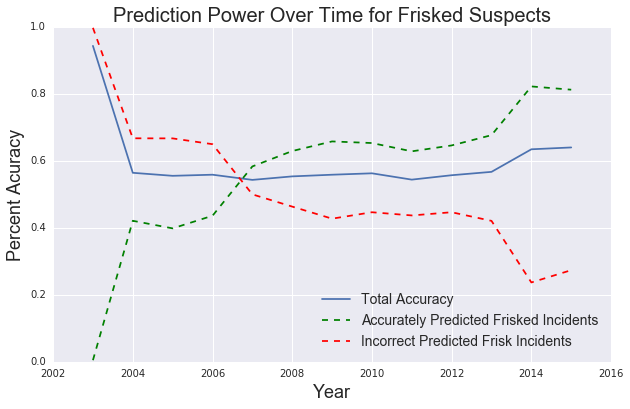

In [139]:
figure(figsize=(10,6))
plt.plot(Year, Total_Accuracy, label = 'Total Accuracy')
plt.plot(Year, Predicted_Frisked_Accuracy, 'g--', label = 'Accurately Predicted Frisked Incidents')
plt.plot(Year, Predicted_No_Frisk_Accuracy, 'r--', label = 'Incorrect Predicted Frisk Incidents')
plt.legend(loc=0, fontsize=14)
plt.title('Prediction Power Over Time for Frisked Suspects', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Percent Acuracy', fontsize=18)
savefig('Frisked.png')


In [109]:
Total_Accuracy_arr = [0.93993, 0.53993, 0.97253, 0.95786, 0.93995, 0.93982, 0.9371, 0.92905, 0.93877, 0.93806, 0.92485, 0.829, 0.79856]
Predicted_Arrest_Accuracy = [0, 0.51908, 0, 0, 0.00379, 0.00289, 0.0037, 0.00576, 0.00298, 0.0038, 0.00487, 0.047, 0.06102]
Predicted_No_Arrest_Accuracy = [0.99351, 0.55679, 0.99959, 0.99922, 0.99721, 0.99768, 0.99771, 0.9969, 0.99777, 0.99742, 0.99652, 0.96539, 0.96082]

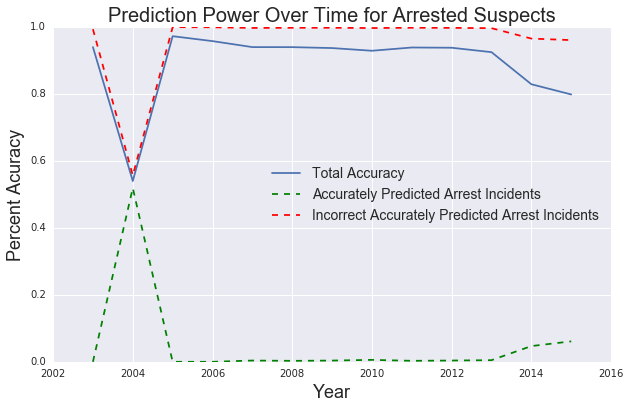

In [140]:
figure(figsize=(10,6))
plt.plot(Year, Total_Accuracy_arr, label = 'Total Accuracy')
plt.plot(Year, Predicted_Arrest_Accuracy, 'g--', label = 'Accurately Predicted Arrest Incidents')
plt.plot(Year, Predicted_No_Arrest_Accuracy, 'r--', label = 'Incorrect Accurately Predicted Arrest Incidents')
plt.legend(loc=0, fontsize=14)
plt.title('Prediction Power Over Time for Arrested Suspects', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Percent Acuracy', fontsize=18)
savefig('Arrested.png')

In [142]:
from sklearn.metrics import roc_auc_score

In [151]:
roc_auc_score(test_label,predicted)


0.51092154420921543

In [340]:
nyc_murders_by_year = {
1928:404,
1929:425,
1930:494,
1931:588,
1932:579,
1933:541,
1934:458,
1935:NaN,
1936:510,
1937:NaN,
1938:NaN,
1939:NaN,
1940:NaN,
1941:NaN,
1942:NaN,
1943:NaN,
1944:NaN,
1945:NaN,
1946:NaN,
1947:NaN,
1948:NaN,
1949:NaN,
1950:NaN,
1951:NaN,
1952:NaN,
1953:NaN,
1954:NaN,
1955:NaN,
1956:NaN,
1957:NaN,
1958:NaN,
1959:NaN,
1960:482,
1961:483,
1962:631,
1963:548,
1964:636,
1965:634,
1966:654,
1967:746,
1968:986,
1969:1043,
1970:1117,
1971:1466,
1972:1691,
1973:1680,
1974:1554,
1975:1645,
1976:1622,
1977:1557,
1978:1504,
1979:1733,
1980:1814,
1981:1826,
1982:1668,
1983:1622,
1984:1450,
1985:1384,
1986:1582,
1987:1672,
1988:1896,
1989:1905,
1990:2245,
1991:2154,
1992:1995,
1993:1946,
1994:1561,
1995:1177,
1996:983,
1997:770,
1998:633,
1999:671,
2000:673,
2001:649,
2002:587,
2003:597,
2004:570,
2005:539,
2006:596,
2007:494,
2008:522,
2009:471,
2010:534,
2011:515,
2012:414,
2013:332,
2014:328,
2015:352}

In [197]:
float(sum(murders[:] for d in range(len(nyc_murders_by_year)) / len(nyc_murders_by_year)))

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [1]:
#murders

In [349]:
murders = []
for d in range(len(nyc_murders_by_year)):
    murders.append(nyc_murders_by_year.values()[d])

In [350]:
murders_df = pd.DataFrame(murders)

In [351]:
mean = murders_df[:20].mean()
sigma = murders_df[:20].std()
threashhold = [[mean+(sigma*3)]*len(murders_df), [mean-(sigma*3)]*len(murders_df)]

In [354]:
len(threashhold[1])

88

In [365]:
nyc_murders_by_year.keys()[31]

1959

In [356]:
88-56

32

In [358]:
len(threashhold[1][:56])

56

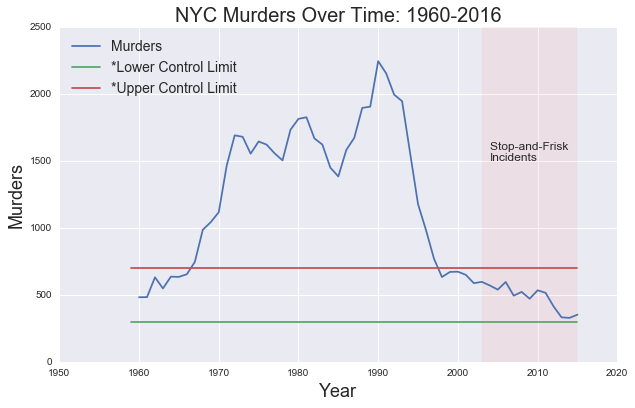

In [367]:
figure(figsize=(10,6))
plt.plot(nyc_murders_by_year.keys()[31:], nyc_murders_by_year.values()[31:], label = 'Murders')
plt.plot(nyc_murders_by_year.keys()[31:], threashhold[1][:57], label='*Lower Control Limit')
plt.plot(nyc_murders_by_year.keys()[31:], threashhold[0][:57], label='*Upper Control Limit') 
plt.legend(loc=0, fontsize=14)
plt.title('NYC Murders Over Time: 1960-2016', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Murders', fontsize=18)
gca = plt.gca()
gca.set_ylim([0,2500])
plt.annotate(s="Stop-and-Frisk \nIncidents", xy=(2004,1500), fontsize=12)
gca.add_patch(plt.Rectangle((2003,0), 12, 2500, alpha=.05, color="red"))
# include data source
#plt.text(1950, -500, 'Data source: nyc.gov | Historical New York City Crime Data' , fontsize=14)
savefig('Murders.png')

In [214]:
#nyc_murders_by_year.values()

In [298]:
crime_rate_file = pd.read_excel('seven_major_felony_offenses_2000_2015.xls', header=4)
crime_rate_df = pd.DataFrame(crime_rate_file)
crime_rate_df.drop(crime_rate_df.index[8:], inplace=True)
crime_rate_df = crime_rate_df.T

In [337]:
crime_rate_df.head()


,0,1,2,3,4,5,6,7
OFFENSE,MURDER & NON-NEGL. MANSLAUGHTER,RAPE,ROBBERY,FELONY ASSAULT,BURGLARY,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,TOTAL SEVEN MAJOR FELONY OFFENSES
2000,673,2068,32562,25924,38352,49631,35442,184652
2001,649,1981,28202,23453,32763,46329,29531,162908
2002,587,2144,27229,21147,31275,45771,26656,154809
2003,597,2070,25989,19139,29110,46751,23413,147069


In [326]:
#range(2000,2016)
#OFFENSE	2000	2001	2002	2003	2004	2005	2006	2007	2008	2009	2010	2011	2012	2013	2014	2015
#MURDER & NON-NEGL. MANSLAUGHTER
murder = np.array([673, 649, 587, 597, 570, 539, 596, 496, 523, 471, 536, 515, 419, 335, 333, 352])
#RAPE
rape = np.array([2068, 1981, 2144, 2070, 1905, 1858, 1525, 1351, 1299, 1205, 1373, 1420, 1445, 1378, 1352, 1438])
#ROBBERY
robbery = np.array([32562, 28202, 27229, 25989, 24373, 24722, 23739, 21809, 22401, 18601, 19486, 19717, 20144, 19128, 16539, 16931])
#FELONY ASSAULT
felony_assault = np.array([25924, 23453, 21147, 19139, 18622, 17750, 17309, 17493, 16284, 16773, 16956, 18482, 19381, 20297, 20207, 20270])
#BURGLARY
burglary = np.array([38352, 32763, 31275, 29110, 26976, 24117, 23143, 21762, 20725, 19430, 18600, 18720, 19168, 17429, 16765, 15125])
#GRAND LARCENY
grand_larceny = np.array([49631, 46329, 45771, 46751, 48763, 48243, 46625, 44924, 44242, 39580, 37835, 38501, 42497, 45368, 43862, 44005])
#GRAND LARCENY OF MOTOR VEHICLE
grand_larceny_of_motor_vehicle = np.array([35442, 29531, 26656, 23413, 20884, 18246, 15745, 13174, 12482, 10670, 10329, 9314, 8093, 7400, 7664, 7332])
#TOTAL SEVEN MAJOR FELONY OFFENSES
total = np.array([184652, 162908, 154809, 147069, 142093, 135475, 128682, 121009, 117956, 106730, 105115, 106669, 111147, 111335, 106722, 105453])
population_by_year = {2000:8008278, 2010:8175133} 
pop_ave = (8008278.+8175133.)/2.

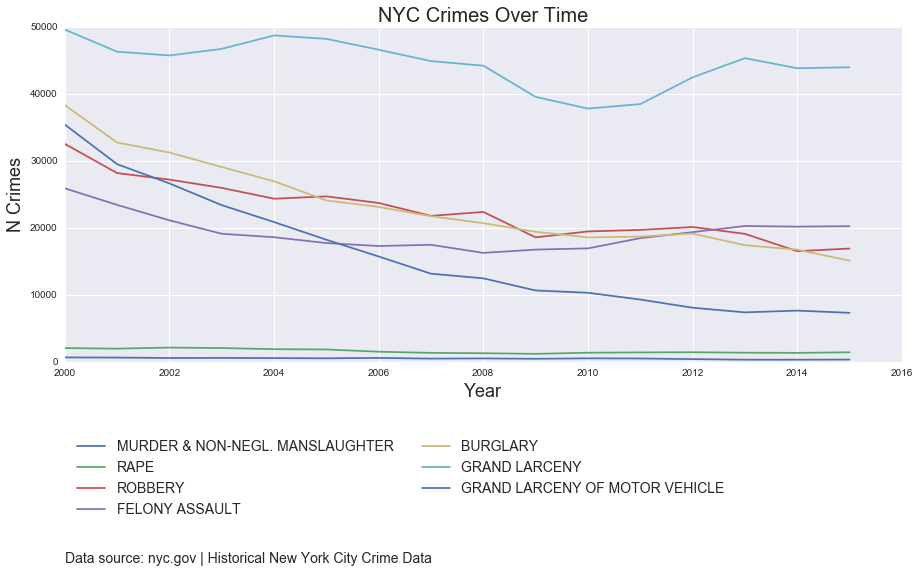

In [338]:
figure(figsize=(15,6))
plt.plot(range(2000,2016), murder, label = 'MURDER & NON-NEGL. MANSLAUGHTER')
plt.plot(range(2000,2016), rape, label = 'RAPE')
plt.plot(range(2000,2016), robbery, label = 'ROBBERY')
plt.plot(range(2000,2016), felony_assault, label = 'FELONY ASSAULT')
plt.plot(range(2000,2016), burglary, label = 'BURGLARY')
plt.plot(range(2000,2016), grand_larceny, label = 'GRAND LARCENY')
plt.plot(range(2000,2016), grand_larceny_of_motor_vehicle, label = 'GRAND LARCENY OF MOTOR VEHICLE')
#plt.plot(range(2000,2016), total, label = 'TOTAL SEVEN MAJOR FELONY OFFENSES')
#plt.legend(loc=0, fontsize=14)
plt.legend(bbox_to_anchor=(0, -.5), loc=3,
       ncol=2, fontsize=14)
plt.title('NYC Crimes Over Time', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('N Crimes', fontsize=18)

# include data source
plt.text(2000, -30000, 'Data source: nyc.gov | Historical New York City Crime Data' , fontsize=14)
savefig('nyc_crimes.png')

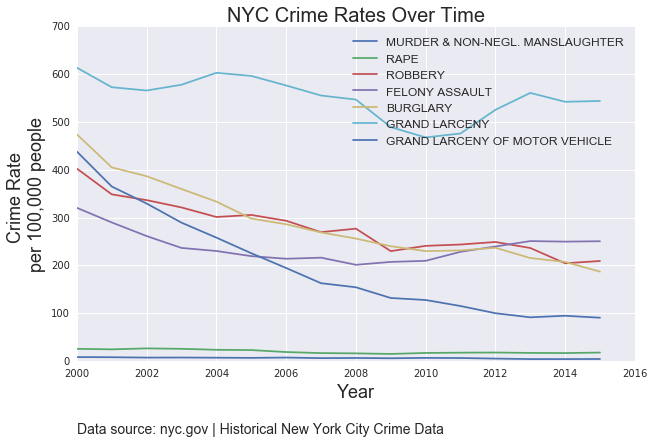

In [405]:
figure(figsize=(10,6))

plt.plot(range(2000,2016), (murder/pop_ave)*100000.0, label = 'MURDER & NON-NEGL. MANSLAUGHTER')
plt.plot(range(2000,2016), (rape/pop_ave)*100000.0, label = 'RAPE')
plt.plot(range(2000,2016), (robbery/pop_ave)*100000.0, label = 'ROBBERY')
plt.plot(range(2000,2016), (felony_assault/pop_ave)*100000.0, label = 'FELONY ASSAULT')
plt.plot(range(2000,2016), (burglary/pop_ave)*100000.0, label = 'BURGLARY')
plt.plot(range(2000,2016), (grand_larceny/pop_ave)*100000.0, label = 'GRAND LARCENY')
plt.plot(range(2000,2016), (grand_larceny_of_motor_vehicle/pop_ave)*100000.0, label = 'GRAND LARCENY OF MOTOR VEHICLE')

plt.legend(loc=0, fontsize=12)
plt.title('NYC Crime Rates Over Time', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Crime Rate \nper 100,000 people', fontsize=18)

# include data source
plt.text(2000, -150, 'Data source: nyc.gov | Historical New York City Crime Data' , fontsize=14)
savefig('nyc_crime_rates.png')

In [354]:
print "A crime rate is calculated by dividing the number of reported crimes by the total population; the result is multiplied by 100,000. For example, in 2010 there were 58,100 robberies in California and the population was 38,826,898. This equals a robbery crime rate of 149.6 per 100,000 general population."

A crime rate is calculated by dividing the number of reported crimes by the total population; the result is multiplied by 100,000. For example, in 2010 there were 58,100 robberies in California and the population was 38,826,898. This equals a robbery crime rate of 149.6 per 100,000 general population.


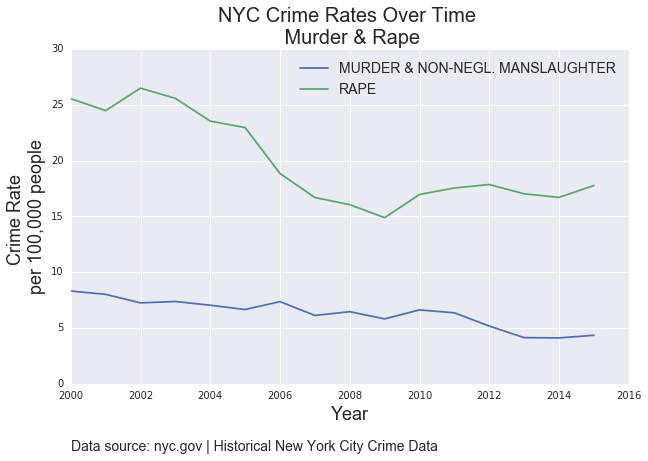

In [430]:
figure(figsize=(10,6))

plt.plot(range(2000,2016), (murder/pop_ave)*100000.0, label = 'MURDER & NON-NEGL. MANSLAUGHTER')
plt.plot(range(2000,2016), (rape/pop_ave)*100000.0, label = 'RAPE')

plt.legend(loc=0, fontsize=14)
plt.title('NYC Crime Rates Over Time \n Murder & Rape', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Crime Rate \nper 100,000 people', fontsize=18)
#gca = plt.gca()
#gca.set_ylim([0,30])
#plt.annotate(s="Stop-and-Frisk Incidents", xy=(2008,23), fontsize=12)
#gca.add_patch(plt.Rectangle((2003,0), 12, 30, alpha=.05, color="red"))
# include data source
plt.text(2000, -6, 'Data source: nyc.gov | Historical New York City Crime Data' , fontsize=14)
savefig('nyc_crime_rates_murder_&_rape.png')

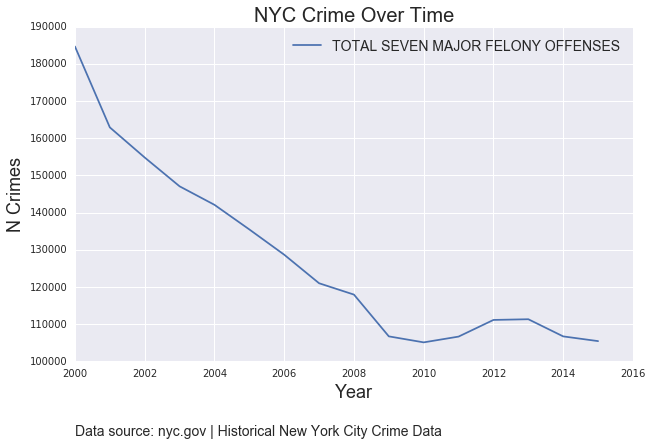

In [407]:
figure(figsize=(10,6))

plt.plot(range(2000,2016), total, label = 'TOTAL SEVEN MAJOR FELONY OFFENSES')
#plt.plot(nyc_murders_by_year.keys(), threashhold[1], label='*Lower Control Limit')
plt.legend(loc=0, fontsize=14)
plt.title('NYC Crime Over Time', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('N Crimes', fontsize=18)

# include data source
plt.text(2000, 80000, 'Data source: nyc.gov | Historical New York City Crime Data' , fontsize=14)
savefig('total_nyc_crimes.png')

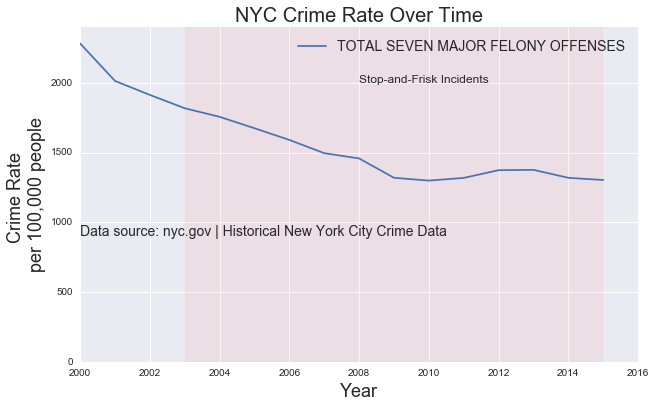

In [327]:
figure(figsize=(10,6))

plt.plot(range(2000,2016), (total/pop_ave)*100000.0, label = 'TOTAL SEVEN MAJOR FELONY OFFENSES')
#plt.plot(nyc_murders_by_year.keys(), threashhold[1], label='*Lower Control Limit')
plt.legend(loc=0, fontsize=14)
plt.title('NYC Crime Rate Over Time', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Crime Rate \nper 100,000 people', fontsize=18)
gca = plt.gca()
gca.set_ylim([0,2400])
plt.annotate(s="Stop-and-Frisk Incidents", xy=(2008,2000), fontsize=12)
gca.add_patch(plt.Rectangle((2003,0), 12, 2400, alpha=.05, color="red"))
# include data source
plt.text(2000, 900, 'Data source: nyc.gov | Historical New York City Crime Data' , fontsize=14)
savefig('total_nyc_crime_rate.png')

In [328]:
crime_rate_by_precinct_file = pd.read_excel('seven_major_felony_offenses_by_precinct_2000_2015_2016-10.xls', skiprows=2)
crime_rate_by_precinct_df = pd.DataFrame(crime_rate_by_precinct_file)
#crime_rate_by_precinct_df.drop(crime_rate_by_precinct_df.index[8:], inplace=True)
crime_rate_by_precinct_file.head(30)

,PCT,CRIME,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,1,MURDER & NON NEGL. MANSLAUGHTER ...,3.0,1.0,2.0,2.0,2.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0
1,NaN,RAPE,12.0,5.0,10.0,11.0,11.0,5.0,4.0,7.0,12.0,4.0,6.0,13.0,10.0,12.0,8.0,7.0
2,NaN,ROBBERY,252.0,188.0,210.0,164.0,154.0,172.0,119.0,128.0,108.0,106.0,96.0,102.0,81.0,68.0,50.0,79.0
3,NaN,FELONY ASSAULT,139.0,164.0,147.0,134.0,129.0,121.0,94.0,90.0,83.0,83.0,68.0,94.0,110.0,87.0,76.0,86.0
4,NaN,BURGLARY,475.0,437.0,297.0,403.0,246.0,293.0,255.0,231.0,189.0,207.0,170.0,155.0,188.0,171.0,145.0,138.0
5,NaN,GRAND LARCENY,2358.0,2117.0,1896.0,1803.0,1708.0,1624.0,1462.0,1395.0,1258.0,1122.0,1065.0,979.0,985.0,1051.0,896.0,1114.0
6,NaN,GRAND LARCENY OF MOTOR VEHICLE ...,199.0,157.0,153.0,132.0,133.0,90.0,78.0,63.0,57.0,54.0,38.0,59.0,41.0,27.0,33.0,21.0
7,NaN,TOTAL SEVEN MAJOR FELONY OFFENSES,3438.0,3069.0,2715.0,2649.0,2383.0,2305.0,2013.0,1914.0,1708.0,1578.0,1445.0,1402.0,1416.0,1416.0,1208.0,1446.0
8,5,MURDER & NON NEGL. MANSLAUGHTER ...,4.0,3.0,0.0,3.0,1.0,4.0,2.0,2.0,2.0,1.0,1.0,0.0,3.0,3.0,2.0,1.0
9,NaN,RAPE,9.0,3.0,12.0,7.0,7.0,13.0,5.0,4.0,2.0,6.0,10.0,11.0,12.0,5.0,4.0,10.0


In [160]:
pct = crime_rate_by_precinct_file.PCT.iloc[:609:8]

In [214]:
crime = pd.DataFrame(crime_rate_by_precinct_file.iloc[7::8,2:]).T
crime.head(300)

,7,15,23,31,39,47,55,63,71,79,...,559,567,575,583,591,599,607,615,623,631
2000,3438.0,1780.0,2387.0,990.0,2115.0,1398.0,3317.0,6857.0,2028.0,5607.0,...,2042.0,3382.0,3738.0,3021.0,2347.0,NaN,1692.0,636.0,NaN,NaN
2001,3069.0,1458.0,2141.0,892.0,1672.0,877.0,3054.0,6088.0,1990.0,5263.0,...,1971.0,2666.0,3528.0,2816.0,2048.0,NaN,1434.0,514.0,NaN,NaN
2002,2715.0,1309.0,2059.0,908.0,1809.0,831.0,3145.0,5265.0,1801.0,4508.0,...,1829.0,2294.0,3291.0,2830.0,1968.0,NaN,1354.0,495.0,NaN,NaN
2003,2649.0,1231.0,2068.0,864.0,1801.0,1436.0,3031.0,5105.0,1796.0,4144.0,...,1465.0,2094.0,2751.0,2367.0,1738.0,NaN,1252.0,467.0,NaN,NaN
2004,2383.0,1170.0,2174.0,857.0,1747.0,1466.0,3071.0,4730.0,1667.0,3992.0,...,1675.0,2165.0,2899.0,2339.0,1785.0,NaN,1356.0,464.0,NaN,NaN
2005,2305.0,1131.0,2055.0,804.0,1664.0,1418.0,2812.0,4423.0,1397.0,3652.0,...,1573.0,2158.0,2766.0,2253.0,1812.0,NaN,1284.0,570.0,NaN,NaN
2006,2013.0,1040.0,1979.0,864.0,1579.0,1469.0,2716.0,4173.0,1391.0,2945.0,...,1395.0,2180.0,2502.0,2169.0,1722.0,NaN,1203.0,475.0,NaN,NaN
2007,1914.0,1031.0,1837.0,856.0,1519.0,1326.0,2540.0,3971.0,1277.0,2761.0,...,1182.0,2272.0,2358.0,1945.0,1706.0,NaN,1259.0,496.0,NaN,NaN
2008,1708.0,1029.0,1738.0,807.0,1495.0,1321.0,2518.0,3708.0,1269.0,2718.0,...,1066.0,2283.0,2249.0,1913.0,1692.0,NaN,1257.0,515.0,NaN,NaN
2009,1578.0,975.0,1633.0,702.0,1523.0,1133.0,2389.0,3330.0,1018.0,2479.0,...,871.0,1993.0,2047.0,1774.0,1505.0,NaN,1079.0,414.0,NaN,NaN


In [151]:
crime.iloc[::,0]

2000    3438.0
2001    3069.0
2002    2715.0
2003    2649.0
2004    2383.0
2005    2305.0
2006    2013.0
2007    1914.0
2008    1708.0
2009    1578.0
2010    1445.0
2011    1402.0
2012    1416.0
2013    1416.0
2014    1208.0
2015    1446.0
Name: 7, dtype: float64

In [192]:
size = get(gcf,'Position');
size = size(3:4); % the last two elements are width and height of the figure
set(gcf,'PaperUnit','points'); % unit for the property PaperSize
set(gcf,'PaperSize',size);

SyntaxError: invalid syntax (<ipython-input-192-fd23296825e8>, line 2)

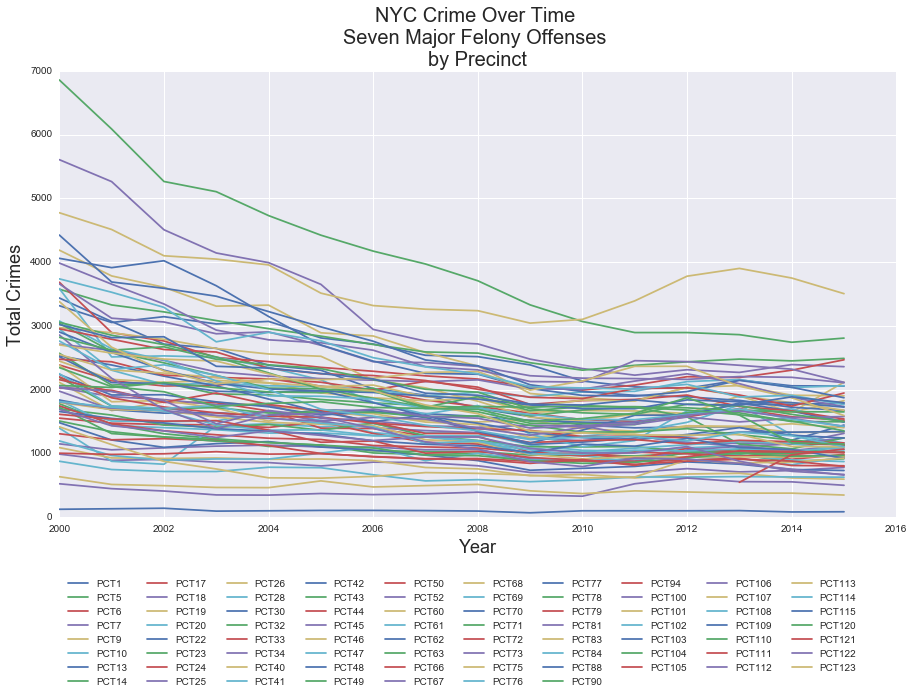

In [279]:
plt.figure(figsize=(15,8))
for x,y in enumerate(pct):
    plot(range(2000,2016),crime.iloc[::,x], label='PCT' + str(y))
plt.title('NYC Crime Over Time \nSeven Major Felony Offenses \nby Precinct', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Total Crimes', fontsize=18)
legend(bbox_to_anchor=(0, -.4), loc=3,
       ncol=10)
savefig('total_nyc_crimes_by_precinct.png')

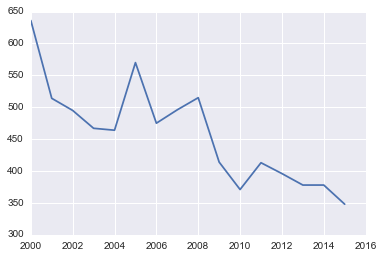

In [280]:
plot(range(2000,2016),crime.iloc[::,x], label='PCT' + str(y))

In [324]:
crime.iloc[:,20:].head()

,167,175,183,191,199,207,215,223,231,239,...,559,567,575,583,591,599,607,615,623,631
2000,1309.0,1977.0,2449.0,1834.0,1838.0,3576.0,3685.0,2035.0,2973.0,2952.0,...,2042.0,3382.0,3738.0,3021.0,2347.0,NaN,1692.0,636.0,NaN,NaN
2001,1214.0,1690.0,2162.0,1440.0,1686.0,3329.0,2895.0,1890.0,2893.0,2306.0,...,1971.0,2666.0,3528.0,2816.0,2048.0,NaN,1434.0,514.0,NaN,NaN
2002,1232.0,1718.0,2115.0,1405.0,1632.0,3220.0,2764.0,1845.0,2790.0,2081.0,...,1829.0,2294.0,3291.0,2830.0,1968.0,NaN,1354.0,495.0,NaN,NaN
2003,1201.0,1586.0,2146.0,1372.0,1639.0,3084.0,2505.0,1763.0,2646.0,2100.0,...,1465.0,2094.0,2751.0,2367.0,1738.0,NaN,1252.0,467.0,NaN,NaN
2004,1123.0,1656.0,2103.0,1320.0,1592.0,2957.0,2440.0,1756.0,2560.0,2061.0,...,1675.0,2165.0,2899.0,2339.0,1785.0,NaN,1356.0,464.0,NaN,NaN


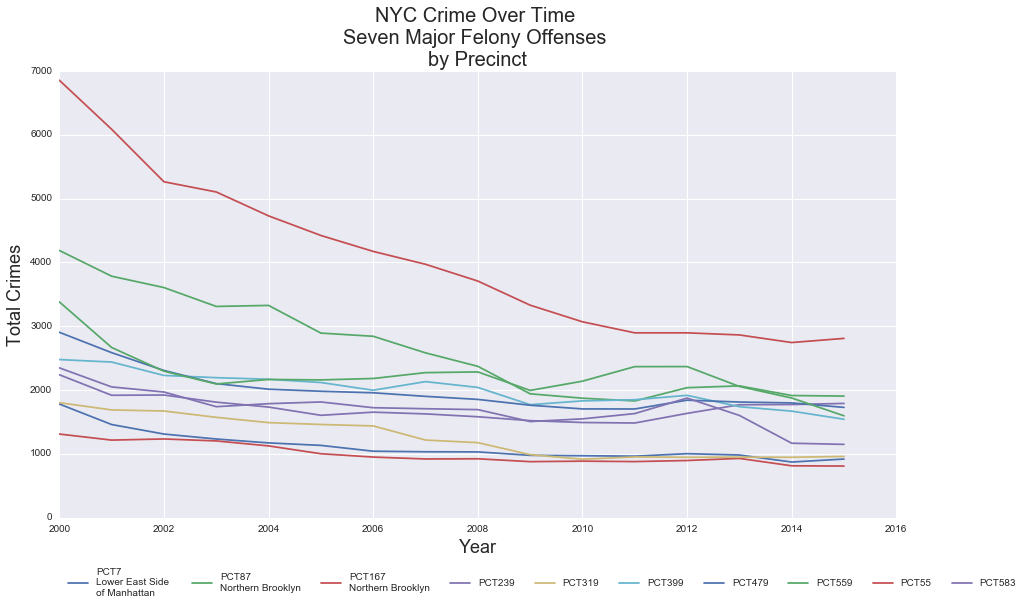

In [321]:
plt.figure(figsize=(15,8))
#for x,y in enumerate(pct):
plot(range(2000,2016),crime.iloc[::,1], label='PCT' + str(15) + '\nLower East Side \nof Manhattan')
plot(range(2000,2016),crime.iloc[::,12], label='PCT' + str(103) + '\nDowntown Jamaica ')
plot(range(2000,2016),crime.iloc[::,20], label='PCT' + str(167) + '\nNorthern Brooklyn')
plot(range(2000,2016),crime.iloc[::,30], label='PCT' + str(239))
plot(range(2000,2016),crime.iloc[::,40], label='PCT' + str(319))
plot(range(2000,2016),crime.iloc[::,50], label='PCT' + str(399))
plot(range(2000,2016),crime.iloc[::,60], label='PCT' + str(479))
plot(range(2000,2016),crime.iloc[::,70], label='PCT' + str(559))
plot(range(2000,2016),crime.iloc[::,7], label='PCT' + str(55))
plot(range(2000,2016),crime.iloc[::,73], label='PCT' + str(583))

plt.title('NYC Crime Over Time \nSeven Major Felony Offenses \nby Precinct', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Total Crimes', fontsize=18)
legend(bbox_to_anchor=(0, -.2), loc=3,
       ncol=10)
savefig('total_nyc_crimes_by_precinct.png')

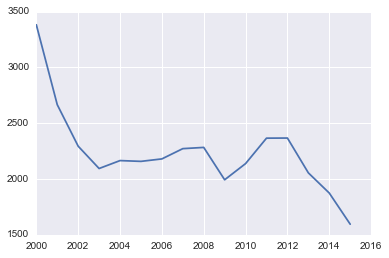

In [293]:
plt.plot(range(2000,2016),crime.iloc[::,70], label='PCT' + str(67))


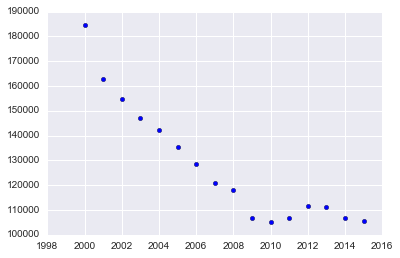

In [265]:
scatter(crime.T.sum().index[:],crime.T.sum())

In [278]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'crime.T ~ crime.T.index[:]', data = crime).fit()

PatsyError: Number of rows mismatch between data argument and crime.T (16 versus 79)
    crime.T ~ crime.T.index[:]
    ^^^^^^^

In [264]:
crime.T.sum().index[:]

Index([   2000,    2001,    2002,    2003,    2004,    2005, u'2006', u'2007',
       u'2008', u'2009',    2010, u'2011',    2012,    2013,    2014,    2015],
      dtype='object')

In [276]:
plot(crime.T.sum().index[:],lm.predict())

SyntaxError: invalid syntax (<ipython-input-276-338ac90afb63>, line 1)

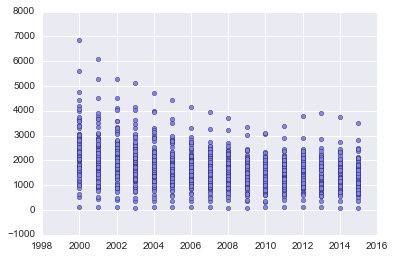

In [269]:
x =[]
y =[]
for x,y in enumerate(pct):
    plt.scatter(range(2000,2016),crime.iloc[::,x], label='PCT' + str(y), c=[.5,.5,1.])
    #x.append()
    #y.append(crime.iloc[::,x])

ValueError: max must be larger than min in range parameter.

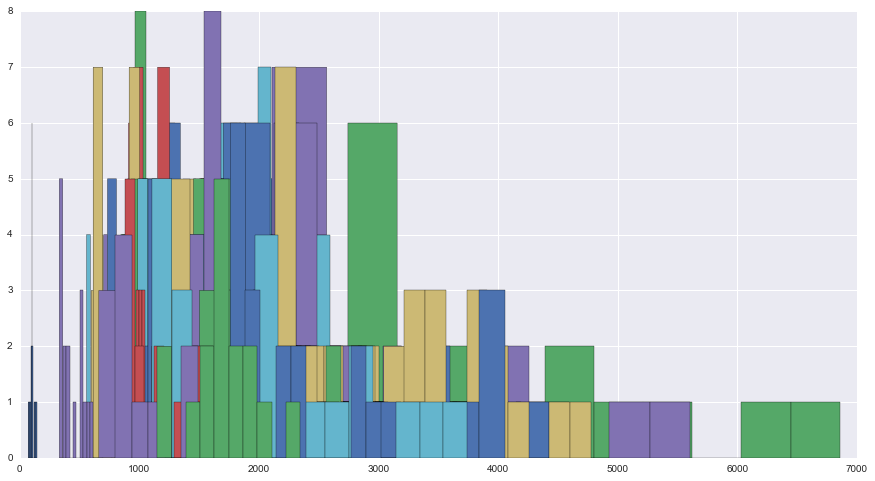

In [275]:
plt.figure(figsize=(15,8))
for x,y in enumerate(pct):
    plt.hist(crime.iloc[::,x], label='PCT' + str(y))
    
plt.title('NYC Crime Over Time \nSeven Major Felony Offenses \nby Precinct', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Total Crimes', fontsize=18)
legend(bbox_to_anchor=(0, -.4), loc=3,
       ncol=10)
savefig('total_nyc_crimes_by_precinct.png')